<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220223_alpha_channel_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


img (360, 640, 4)
img_gray (360, 640)
img_BGR (360, 640, 3)
img_A (360, 640)
img_A_inv (360, 640)


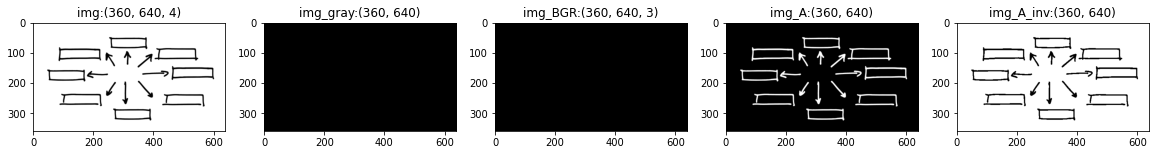

In [44]:
import pandas as np
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/rectangles.png', cv2.IMREAD_UNCHANGED)
img_draw = img.copy()
img_BGR = img[:,:,:3].copy() # BGR 전부 0(검정)
img_A = img[:,:,3].copy() # A에만 값이 있음(흰색), 값없는 부분(검정색:투명)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
print("img", img.shape)
print("img_gray", img_gray.shape) # img : 4채널 이미지를 바이너리화 하여 1채널로 만듬
print("img_BGR", img_BGR.shape) # img : 4채널 중 BGR : 3채널만 가져옴
print("img_A", img_A.shape) # img : 4채널 중 A : 1채널만 가져옴
print("img_A_inv", img_A.shape) # 가져온 A채널을 인버스 바이너리화 하여 배경/전경 역전

_, img_A_inv = cv2.threshold(img_A, 127, 255, cv2.THRESH_BINARY_INV)

imgs = {"img":img,"img_gray":img_gray, "img_BGR":img_BGR, "img_A":img_A, "img_A_inv":img_A_inv}
plt.figure(figsize=(20,10))
for i, (k, v) in enumerate(imgs.items()):
  plt.subplot(1, len(imgs), i+1)
  plt.title("{}:{}".format(k, v.shape))
  plt.imshow(v, cmap='gray')



모형의 개수: 57


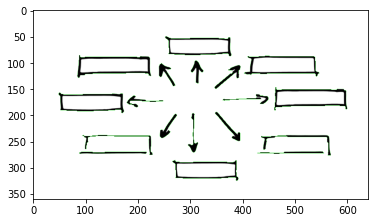

In [45]:
contours, hierarchy = cv2.findContours(img_A, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("모형의 개수:", len(contours))
cv2.drawContours(img_draw, contours, -1, (0,255,0), 2)
plt.imshow(img_draw, cmap='gray')

## Opening(침식 → 팽창)을 통해 모형(윤곽선) 개수 재검출

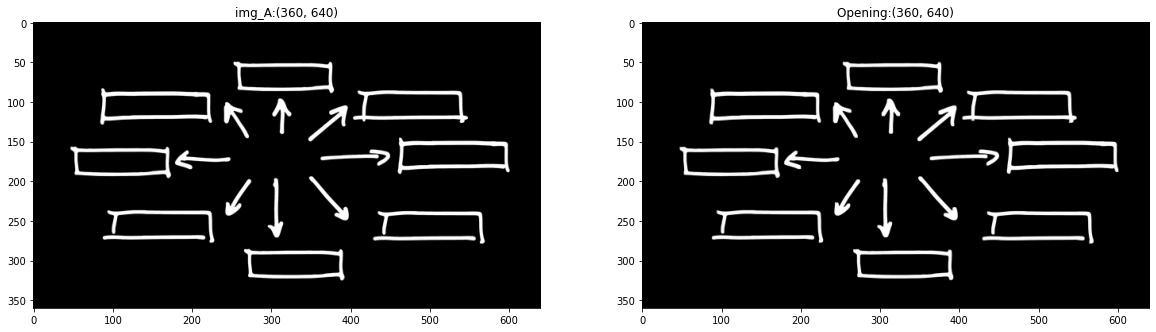

In [49]:
# 침식 → 팽창
kernel = np.ones((3, 3), dtype=np.uint8)
erode = cv2.erode(img_A, kernel, iterations=1)
dilate = cv2.dilate(erode, kernel, iterations=1)

imgs = {"img_A":img_A, "Opening":dilate}
plt.figure(figsize=(20,10))
for i, (k, v) in enumerate(imgs.items()):
  plt.subplot(1, len(imgs), i+1)
  plt.title("{}:{}".format(k, v.shape))
  plt.imshow(v, cmap='gray')

모형의 개수: 18


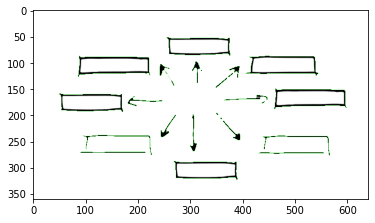

In [50]:
contours, hierarchy = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("모형의 개수:", len(contours))
cv2.drawContours(img_draw, contours, -1, (0,255,0), 2)
plt.imshow(img_draw, cmap='gray')

## Opening을 통해 불필요한 모형들이 제거됨(검출된 모형수: 57 → 18)